# Importing libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

# load The Data

**Mount Google Drive in Colab**


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Extract the Folder in Colab**

In [5]:
import zipfile
import os

# Path to the ZIP file in Google Drive
zip_path = '/content/drive/MyDrive/bbc.zip'

# Extract the ZIP file to a folder
extract_path = '/content/bbc'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Verify the extraction
print("Extracted files:", os.listdir(extract_path))



Extracted files: ['bbc']


**Check Folder Structure**

In [7]:
import os

# Path to the extracted folder
DATA_DIR = '/content/bbc'

# Check the folder structure
for root, dirs, files in os.walk(DATA_DIR):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}\n")


Directory: /content/bbc
Subdirectories: ['bbc']
Files: []

Directory: /content/bbc/bbc
Subdirectories: ['tech', 'sport', 'entertainment', 'politics', 'business']
Files: ['README.TXT']

Directory: /content/bbc/bbc/tech
Subdirectories: []
Files: ['087.txt', '297.txt', '072.txt', '234.txt', '238.txt', '265.txt', '273.txt', '166.txt', '034.txt', '053.txt', '259.txt', '352.txt', '044.txt', '020.txt', '355.txt', '114.txt', '314.txt', '088.txt', '151.txt', '197.txt', '101.txt', '223.txt', '056.txt', '099.txt', '237.txt', '397.txt', '177.txt', '371.txt', '298.txt', '126.txt', '145.txt', '294.txt', '214.txt', '320.txt', '175.txt', '022.txt', '401.txt', '050.txt', '201.txt', '173.txt', '078.txt', '116.txt', '089.txt', '071.txt', '164.txt', '119.txt', '262.txt', '009.txt', '240.txt', '041.txt', '004.txt', '364.txt', '202.txt', '324.txt', '272.txt', '274.txt', '032.txt', '235.txt', '196.txt', '251.txt', '141.txt', '226.txt', '348.txt', '155.txt', '280.txt', '011.txt', '127.txt', '162.txt', '133.tx

In [8]:
import os

DATA_DIR = '/content/bbc'

# Verify each subdirectory contains only files
for category in os.listdir(DATA_DIR):
    category_path = os.path.join(DATA_DIR, category)
    if os.path.isdir(category_path):
        print(f"Category: {category}, Files: {os.listdir(category_path)}")


Category: bbc, Files: ['tech', 'sport', 'entertainment', 'politics', 'business', 'README.TXT']


**Remove Redundant Subdirectories**

In [12]:
import shutil

# Path to the extracted folder
base_dir = '/content/bbc/bbc'

# List of subdirectories to move
subdirs = ['tech', 'sport', 'entertainment', 'politics', 'business']

# Move subdirectories to the correct location
for subdir in subdirs:
    shutil.move(os.path.join(base_dir, subdir), os.path.join('/content/bbc', subdir))

# Remove the unnecessary bbc directory
shutil.rmtree(base_dir)

# Verify the structure after moving
print("Updated directory structure:", os.listdir('/content/bbc'))


Updated directory structure: ['tech', 'sport', 'entertainment', 'politics', 'business']


**Re-run the Loading and Processing Code**

In [14]:
from sklearn.datasets import load_files
import pandas as pd

DATA_DIR = '/content/bbc'

# Load files
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=1000)

# Convert to DataFrame
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

# Display the first few rows
print(df.head(10))


                                                text  label
0  News Corp eyes video games market\n\nNews Corp...      0
1  Wasps 31-37 Leicester\n\nLeicester withstood a...      3
2  Looks and music to drive mobiles\n\nMobile pho...      4
3  'Errors' doomed first Dome sale\n\nThe initial...      2
4  Sculthorpe wants Lions captaincy\n\nPaul Scult...      3
5  Mobile gaming takes off in India\n\nGaming on ...      4
6  Watchdog probes e-mail deletions\n\nThe inform...      2
7  Edwards tips Idowu for Euro gold\n\nWorld outd...      3
8  Parmar ruled out of Davis Cup tie\n\nA knee in...      3
9  World tour for top video gamers\n\nTwo UK game...      4


# EDA

In [15]:
df[df['label']==2].head(30)

,text,label
3,'Errors' doomed first Dome sale\n\nThe initial...,2
6,Watchdog probes e-mail deletions\n\nThe inform...,2
10,Strike threat over pension plans\n\nMillions o...,2
17,Labour MP praises Tory campaign\n\nThe Conserv...,2
19,UK pledges £1bn to vaccine effort\n\nUK Chance...,2
25,Boateng to step down at election\n\nPaul Boate...,2
33,Muslims discuss election concerns\n\nIssues th...,2
34,"Nat Insurance to rise, say Tories\n\nNational ...",2
36,Parties' plans for council tax\n\nAnger at cou...,2
37,Hospital suspends 'no Welsh' plan\n\nAn Englis...,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2225 non-null   object
 1   label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [37]:
# Display the number of samples for each category (label)
df['label'].value_counts()

,count
label,
3,511
0,510
2,417
4,401
1,386


In [18]:
df.shape

(2225, 2)

# TfidfVectorizer

In [38]:
# Initialize the TfidfVectorizer to convert text to numerical features
vec = TfidfVectorizer(stop_words="english")

# Fit the vectorizer on the text data and transform the text into a sparse matrix of TF-IDF features
vec.fit(df.text.values)

# Transform the text data into a sparse matrix of features (TF-IDF representation)
features = vec.transform(df.text.values)

In [21]:
# Convert the sparse matrix of features to a dense numpy array
features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02280016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02459015, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [22]:
# Get the number of samples (rows) and the number of features (columns) in the resulting TF-IDF matrix
len(features.toarray()), len(features.toarray()[0])

(2225, 29126)

# MiniBatchKMeans clustering model

In [23]:
# Initialize the MiniBatchKMeans clustering model with 5 clusters
cls = MiniBatchKMeans(n_clusters=5, random_state=1000)

# Fit the clustering model on the feature data (TF-IDF features)
cls.fit(features)


MiniBatchKMeans(n_clusters=5, random_state=1000)

In [39]:
# Predict the cluster labels for the same dataset after training the model
cls.predict(features)

array([2, 1, 2, ..., 2, 3, 1], dtype=int32)

In [25]:
# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_[:20]

array([2, 1, 2, 0, 1, 2, 4, 1, 1, 1, 0, 2, 2, 0, 3, 1, 2, 4, 0, 0],
      dtype=int32)

In [26]:
# Display the cluster centers for the 5 clusters after fitting the model
cls.cluster_centers_

array([[4.62743259e-05, 1.19502073e-02, 1.07630334e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.56364502e-04, 2.52054639e-03, 0.00000000e+00, ...,
        0.00000000e+00, 6.86911174e-04, 0.00000000e+00],
       [1.37289955e-04, 1.21444460e-02, 0.00000000e+00, ...,
        1.30435798e-04, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.67452475e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.15032259e-03],
       [2.14826245e-04, 1.03671551e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [27]:
len(cls.cluster_centers_) , len(cls.cluster_centers_[0])

(5, 29126)

In [28]:
# Initialize PCA (Principal Component Analysis) to reduce features to 2 dimensions for visualization
pca = PCA(n_components=2, random_state=100)

# Apply PCA to reduce the high-dimensional feature space to 2D
reduced_features = pca.fit_transform(features.toarray())

# Display the reduced 2D features
reduced_features

array([[-0.04277219,  0.06662464],
       [-0.07835577, -0.13051088],
       [-0.07326799,  0.26373002],
       ...,
       [-0.05109815,  0.19521583],
       [-0.07536488, -0.04117384],
       [-0.04190159, -0.06617138]])

In [29]:
# Get the number of samples and the number of dimensions after PCA transformation (2D)
len(reduced_features), len(reduced_features[0])

(2225, 2)

In [30]:
# Apply PCA to reduce the high-dimensional cluster centers to 2D for visualization
reduced_cluster_centers = pca.transform(cls.cluster_centers_)

# Display the reduced 2D cluster centers
reduced_cluster_centers

array([[ 0.02730131,  0.05408261],
       [-0.06834522, -0.10278609],
       [-0.02820392,  0.06708224],
       [-0.07249609, -0.05166622],
       [ 0.22485923, -0.04901002]])

### Explanation of Steps:

**Reduce the features to 2D:** We use PCA to reduce the original high-dimensional feature space into two dimensions for easier visualization.


**Reduce cluster centers to 2D:** The cluster centers, which are initially in 29,126 dimensions, are also projected onto the 2D space to show their locations relative to the data points.


**Scatter plot:**
We create a scatter plot of the reduced feature points, with the color of each point corresponding to its predicted cluster label.
(1)The cmap='viridis' argument adds a color map to distinguish between different clusters visually.

(2)alpha=0.6 makes the points semi-transparent to make overlapping points more distinguishable.


**Cluster centers:** The centers of the 5 clusters are plotted using a red 'X' marker with a larger size (s=200) to make them easily visible.


**Labels and color bar:** The plot is labeled with titles and axes labels, and a color bar is added to show the mapping between colors and cluster labels.


**Legend:** We include a legend to label the cluster centers on the plot.

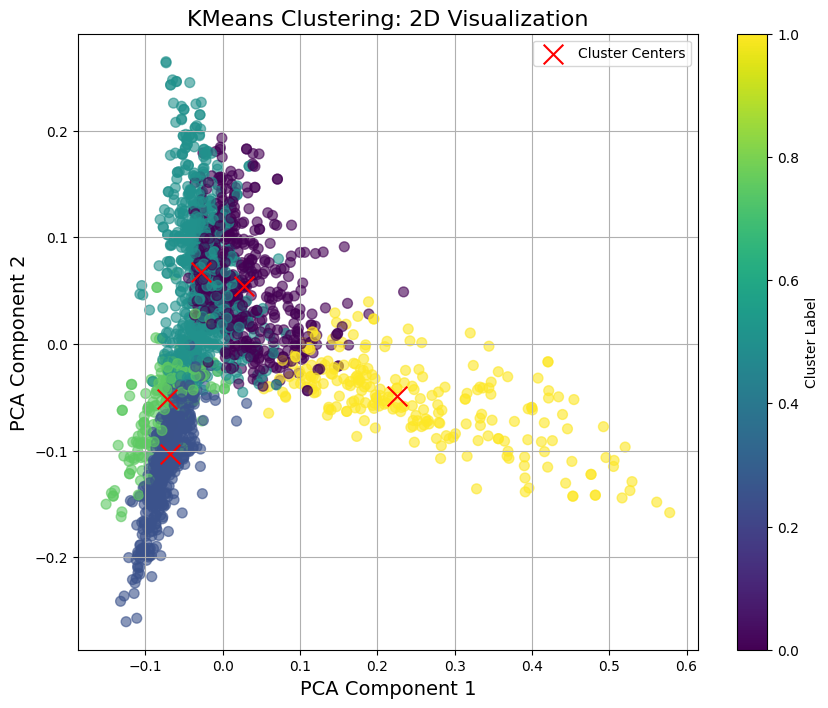

In [41]:
# Step 1: Create a scatter plot of the reduced 2D feature data, color-coded by cluster label
plt.figure(figsize=(10, 8))  # Set the figure size for better visibility
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cls.predict(features), cmap='viridis', s=50, alpha=0.6)

# Step 2: Add the cluster centers to the plot with a different marker and color
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='x', s=200, c='red', label='Cluster Centers')

# Step 3: Add labels and title for clarity
plt.title('KMeans Clustering: 2D Visualization', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)

# Step 4: Show a color bar to indicate the cluster labels
plt.colorbar(label='Cluster Label')

# Step 5: Display the plot
plt.legend()
plt.grid(True)
plt.show()


# Explanation of the Visualization Changes:

**Cluster-wise Data Points:**

Instead of using a single scatter for all data points, I loop through each cluster (for i in range(5)), and plot points of the same cluster in the same color.
This makes it easier to distinguish between the clusters visually since each cluster will have a unique color.

**Cluster Centers as 'X':**

Cluster centers are plotted using larger black 'X' markers (marker='X'), which makes them more prominent compared to the data points.


**Enhanced Labels and Aesthetics:**

The plot includes a title that specifies the purpose of the plot.
Axis labels are added for clarity on the dimensions.
A grid is enabled for better readability and comparison of the data points.


**Legend:** The legend clearly marks each cluster with a different label and highlights the cluster centers.

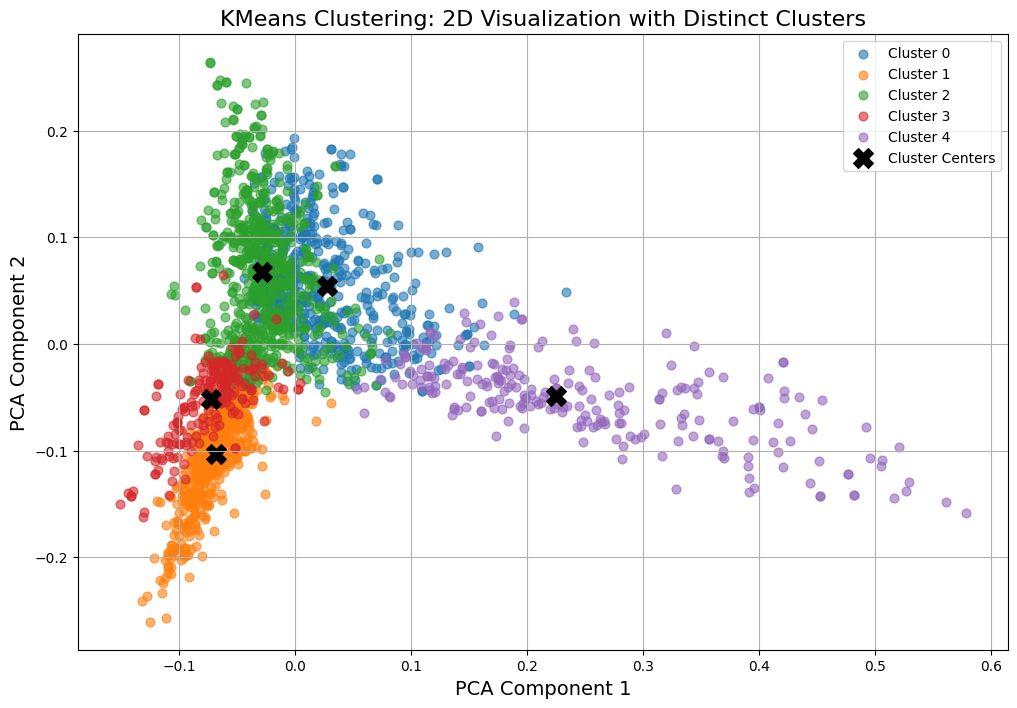

In [42]:
# Step 1: Create a figure and axis for plotting
plt.figure(figsize=(12, 8))

# Step 2: Plot data points with different colors for each cluster
for i in range(5):  # 5 clusters
    plt.scatter(reduced_features[cls.predict(features) == i, 0],  # Select points in the ith cluster
                reduced_features[cls.predict(features) == i, 1],  # Select points in the ith cluster
                label=f'Cluster {i}',  # Label for each cluster
                alpha=0.6,  # Transparency for overlap
                s=40)  # Size of the data points

# Step 3: Plot the cluster centers with a larger marker
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:, 1], marker='X', c='black', s=200, label='Cluster Centers')

# Step 4: Add title, labels, and grid for clarity
plt.title('KMeans Clustering: 2D Visualization with Distinct Clusters', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.grid(True)

# Step 5: Add a legend to show cluster labels
plt.legend()

# Step 6: Show the plot
plt.show()



**To visualize how PCA (Principal Component Analysis)** works, we can show the transformation from the original high-dimensional feature space to the reduced 2D space. The goal is to demonstrate how PCA projects data points onto the principal components and reduces the dimensionality.

**Steps for the Visualization:**


**(1)Original High-dimensional Space (before PCA):** A 3D scatter plot can be used to show the data before any reduction. We'll use the first three principal components to visualize the data in 3D.

**(2)PCA Projection (after PCA):** The data will be projected into 2D space, showing how PCA finds the two principal axes that best explain the variance in the data.

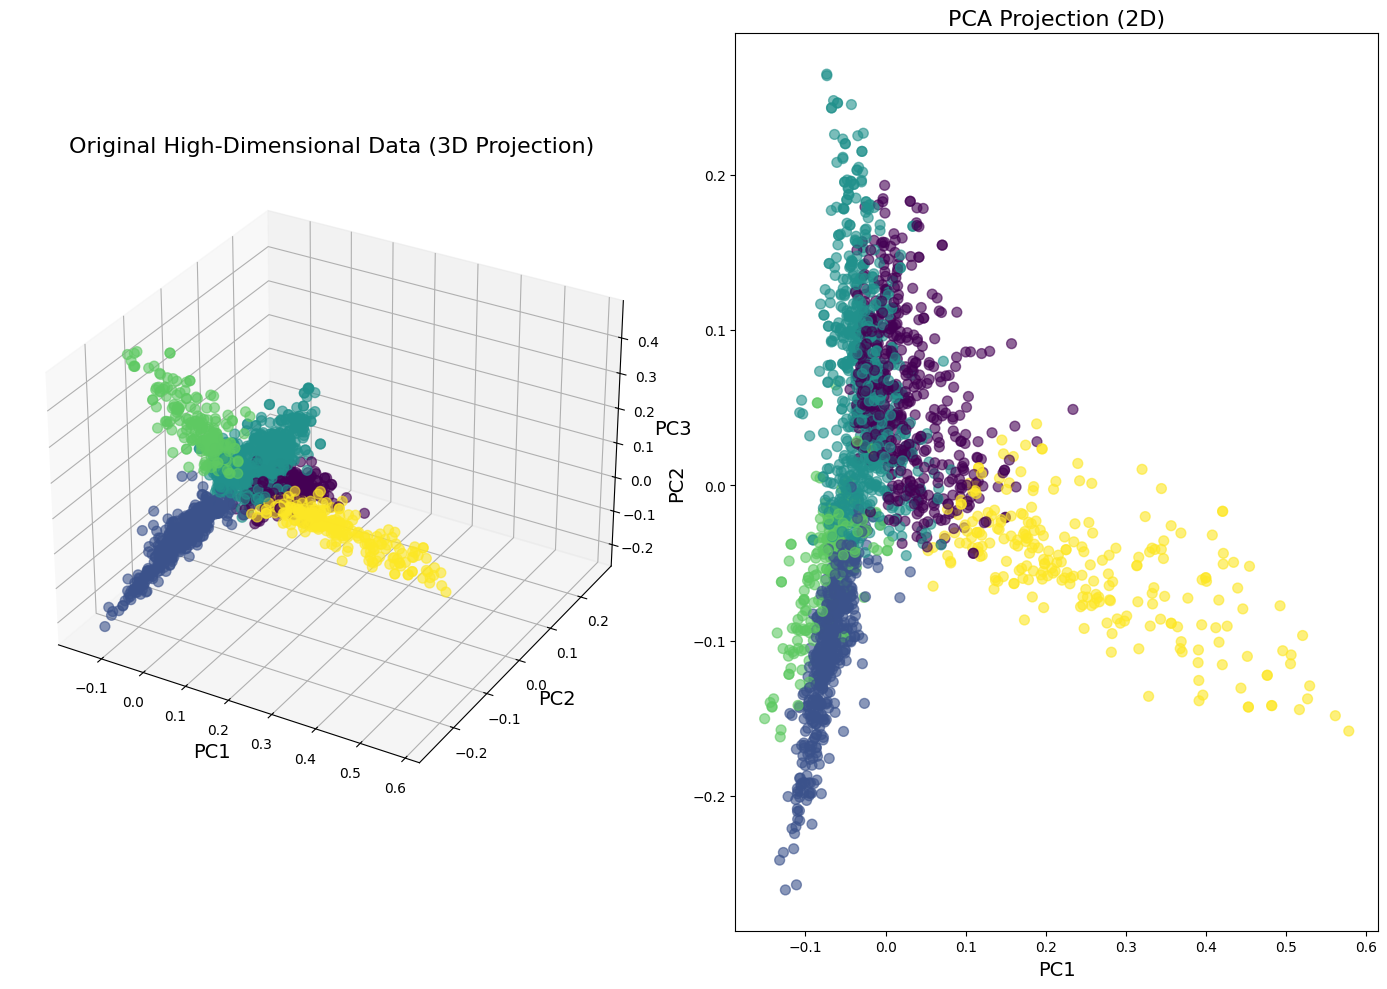

In [43]:
# Step 1: Reduce the original high-dimensional feature matrix to 3D using PCA (for visualization)
pca_3d = PCA(n_components=3, random_state=100)  # Set n_components=3 for 3D visualization
reduced_features_3d = pca_3d.fit_transform(features.toarray())  # Apply PCA to reduce to 3D

# Step 2: Create a 3D scatter plot to show the original data in 3D space
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(121, projection='3d')  # Left plot: Original data in 3D
ax.scatter(reduced_features_3d[:, 0], reduced_features_3d[:, 1], reduced_features_3d[:, 2],
           c=cls.predict(features), cmap='viridis', s=50, alpha=0.6)
ax.set_title('Original High-Dimensional Data (3D Projection)', fontsize=16)
ax.set_xlabel('PC1', fontsize=14)
ax.set_ylabel('PC2', fontsize=14)
ax.set_zlabel('PC3', fontsize=14)

# Step 3: Reduce the original data to 2D using PCA (for easy visualization of how PCA works)
pca_2d = PCA(n_components=2, random_state=100)  # Set n_components=2 for 2D visualization
reduced_features_2d = pca_2d.fit_transform(features.toarray())  # Apply PCA to reduce to 2D

# Step 4: Create a 2D scatter plot to show the PCA projection (after dimensionality reduction)
ax2 = fig.add_subplot(122)  # Right plot: 2D PCA projection
ax2.scatter(reduced_features_2d[:, 0], reduced_features_2d[:, 1], c=cls.predict(features), cmap='viridis', s=50, alpha=0.6)
ax2.set_title('PCA Projection (2D)', fontsize=16)
ax2.set_xlabel('PC1', fontsize=14)
ax2.set_ylabel('PC2', fontsize=14)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


In [32]:
# Import the homogeneity score to evaluate clustering quality
from sklearn.metrics import homogeneity_score

# Calculate the homogeneity score: measures how much the clustering matches the true labels
homogeneity_score(df.label, cls.predict(features))

0.6604306364168545

In [33]:
# Predict the cluster label for a new sample (e.g., the word 'president')
cls.predict(vec.transform(['president']))

array([0], dtype=int32)

In [34]:
# Predict the cluster label for other new samples (e.g., 'music')
cls.predict(vec.transform(['music']))

array([2], dtype=int32)

In [35]:
# Predict the cluster label for other new samples (e.g., 'game')
cls.predict(vec.transform(['game']))

array([1], dtype=int32)

In [40]:
# Predict the cluster label for other new samples (e.g.'talks')
cls.predict(vec.transform(['talks']))

array([0], dtype=int32)